In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/Colab Notebooks/datasets/crop_diseases.zip'
destination_path = '/content/drive/MyDrive/Colab Notebooks/datasets/'

# create the destination folder
os.makedirs(destination_path, exist_ok=True)


print("Unzipping dataset")
!unzip -q '{zip_path}' -d '{destination_path}'
print("Dataset successfully unzipped!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unzipping dataset
replace /content/drive/MyDrive/Colab Notebooks/datasets/crop_diseases/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A

Dataset successfully unzipped!


In [3]:
# importing required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.19.0


In [4]:
# path of the data directory
data_dir = "/content/drive/MyDrive/Colab Notebooks/datasets/crop_diseases"

#defining image dimensions
img_height = 128
img_width = 128

#batch size
batch_size = 32

print(f"Image data directory is set to : {data_dir}")


Image data directory is set to : /content/drive/MyDrive/Colab Notebooks/datasets/crop_diseases


In [5]:
# Create an image data generator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Normalize pixel values (0-255 to 0-1)
    shear_range=0.2,                # Randomly applies shearing transformations
    zoom_range=0.2,                 # Randomly zooms image
    horizontal_flip=True,           # Randomly flips images horizontally
    validation_split=0.2            # Use 20% of the data for validation
)

# This uses the same ImageDataGenerator instance to ensure consistent splits
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


# Load training images
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Load validation images
validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# Number of classes (diseases + healthy)
num_classes = train_generator.num_classes
class_names = list(train_generator.class_indices.keys())

print(f"\nFound {train_generator.samples} training images belonging to {num_classes} classes.")
print(f"Found {validation_generator.samples} validation images belonging to {num_classes} classes.")
print(f"Class names: {class_names}")

Found 68203 images belonging to 50 classes.
Found 17028 images belonging to 50 classes.

Found 68203 training images belonging to 50 classes.
Found 17028 validation images belonging to 50 classes.
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash

In [ ]:
# CNN
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the 3D output to 1D
    Flatten(),

    # Fully Connected Layers
    Dense(512, activation='relu'),
    Dropout(0.5), # prevent overfitting
    Dense(num_classes, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,964,466 (49.46 MB)

 Trainable params: 12,964,466 (49.46 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Model training
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

print("\nModel training complete!")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 617s 287ms/step - accuracy: 0.3389 - loss: 2.3698 - val_accuracy: 0.6687 - val_loss: 0.8930
Epoch 2/10
   1/2131 ━━━━━━━━━━━━━━━━━━━━ 1:06 31ms/step - accuracy: 0.6250 - loss: 1.1035

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.6250 - loss: 1.1035 - val_accuracy: 0.6560 - val_loss: 0.9487
Epoch 3/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 595s 279ms/step - accuracy: 0.6365 - loss: 0.9951 - val_accuracy: 0.7310 - val_loss: 0.6496
Epoch 4/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.6875 - loss: 0.7639 - val_accuracy: 0.7347 - val_loss: 0.6366
Epoch 5/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 573s 269ms/step - accuracy: 0.6825 - loss: 0.7843 - val_accuracy: 0.7272 - val_loss: 0.6404
Epoch 6/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 61s 29ms/step - accuracy: 0.5938 - loss: 0.7863 - val_accuracy: 0.7323 - val_loss: 0.6218
Epoch 7/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 571s 268ms/step - accuracy: 0.7154 - loss: 0.6632 - val_accuracy: 0.7471 - val_loss: 0.5398
Epoch 8/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 60s 28ms/step - accuracy: 0.7812 - loss: 0.5158 - val_accuracy: 0.7496 - val_loss: 0.5250
Epoch 9/10
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 575s 270ms/step - accuracy: 0.7240 - lo

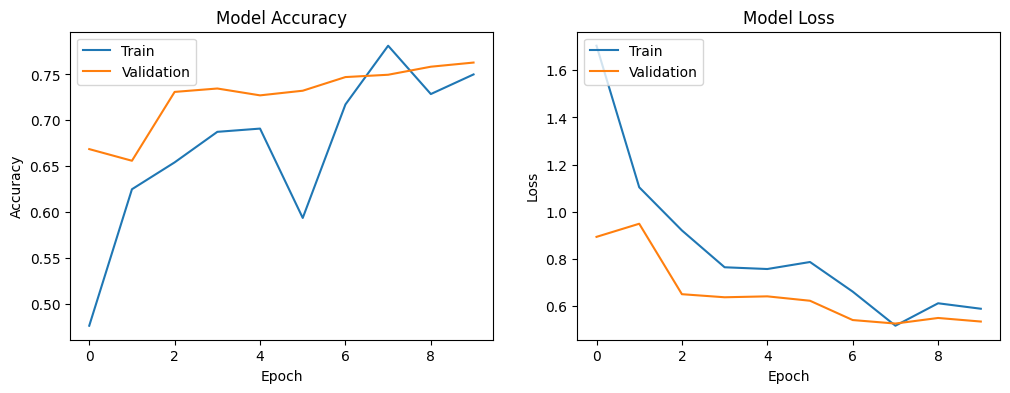

533/533 ━━━━━━━━━━━━━━━━━━━━ 65s 122ms/step - accuracy: 0.7656 - loss: 0.5298
Final Validation Loss: 0.5335
Final Validation Accuracy: 76.29%


In [8]:
# plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# final evaluation metrics for the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Final Validation Loss: {loss:.4f}")
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")

In [10]:
# saving the trained model
model.save('plant_disease_model.h5')
model.save('plant_disease_model.keras')
print("\nModel saved successfully as 'plant_disease_model.h5 and plant_disease_model.keras'")


Model saved successfully as 'plant_disease_model.h5 and plant_disease_model.keras'
